Twitter for iPhone 10193
Twitter Web Client 3635
Twitter Web Client 1643
Twitter for Android 539
Facebook 380
Twitter for Android 322
Twitter for Windows 236
Twitter for iPhone 172
Twitter for Android 150
Twitter for iPhone 142
Twitter for iPhone 91
dlvr.it 75
Twibble.io 74
Twitter for iPhone 55
Twitter Web Client 47
<FreqDist with 194 samples and 18377 outcomes>


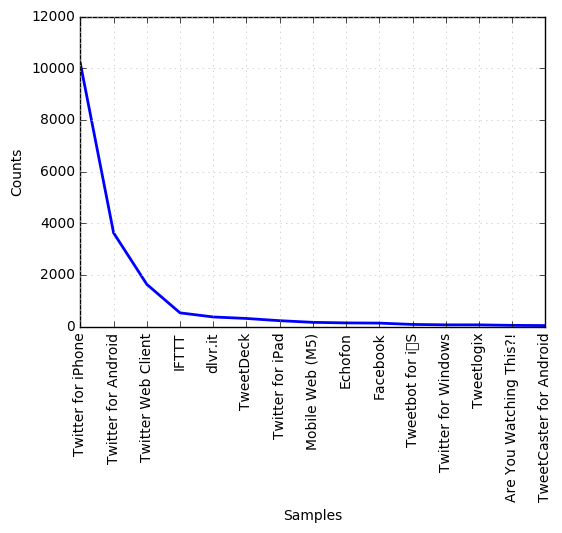

In [30]:
import pandas as pd
import vincent
from pandas.tseries.resample import TimeGrouper
from pandas.tseries.offsets import DateOffset

# mongo to csv: mongoexport --host localhost --db dbname --collection name --csv --out text.csv --fields field1, field2, field3
np = pd.read_csv('/Users/paulchong/Desktop/Thinkful/Python/twitterAnalysis/lakers.csv')
np['created_at'] = pd.to_datetime(pd.Series(np['created_at']))
np.set_index('created_at', drop=False, inplace=True)
np.index = np.index.tz_localize('GMT').tz_convert('US/Pacific')
np.index = np.index - DateOffset(hours = 24)
np1m = np['created_at'].resample('1t').count()

import nltk
from nltk.corpus import stopwords
from nltk import FreqDist
from textblob import TextBlob
import statistics
stop = stopwords.words('english')
text = np['text']
tokens = []
for txt in text.values:
    tokens.extend([t.lower().strip(":,.") for t in txt.split()])

filtered_tokens = [w for w in tokens if not w in stop]
freq_distribution = nltk.FreqDist(filtered_tokens)
# print(freq_distribution.most_common(25))
# freq_distribution.plot(25)

count = 0
while count < 15:
    print('{} {}'.format(np.source[count], np.source.value_counts()[count]))
    count += 1
source = nltk.FreqDist(np.source)
print(source)
source.plot(15)